# Plots zum Klimawandel

## Durchschnittstemperatur (Land und Ozean zusammen)

Wir wollen nun die globalen Temperaturen visualisieren und greifen dazu auf die Daten der [NASA](https://data.giss.nasa.gov/gistemp/graphs_v4/) zurück.

Es werden somit Daten von Dateien (online oder offline) eingelesen mit der Python Bilbiothek `pandas`

### Daten importieren

In [11]:
import pandas as pd
link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"

Temp_NASA = pd.read_csv(link, header=1) # einlesen
Temp_NASA # Ausgabe

,Year,No_Smoothing,Lowess(5)
0,1880,-0.16,-0.08
1,1881,-0.07,-0.12
2,1882,-0.10,-0.16
3,1883,-0.16,-0.19
4,1884,-0.28,-0.23
...,...,...,...
136,2016,1.01,0.87
137,2017,0.92,0.91
138,2018,0.85,0.95
139,2019,0.98,0.98


### Daten plotten

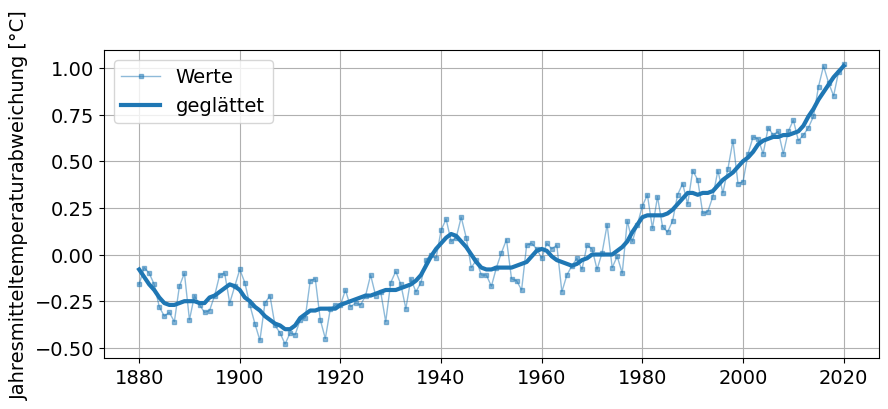

In [35]:
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Temperatur [°C]")
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA["Year"],Temp_NASA["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:blue", alpha=0.5, label="Werte");
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(5)"], lw=3,  color="tab:blue", label="geglättet");
plt.legend();
plt.grid();

### Datenverarbeitung

Die Bibliothek `pandas` ist sehr umfangreich und wird viel zur Datenverarbeitung genutzt. Im folgenden dazu einige Beispiele

**alle Spalten analysieren (Anzahl/Mittelwert/Min/Max/Percentile)**

In [38]:
Temp_NASA.describe()

,Year,No_Smoothing,Lowess(5)
count,141.000000,141.000000,141.000000
mean,1950.000000,0.050213,0.050213
std,40.847277,0.356620,0.345703
min,1880.000000,-0.480000,-0.400000
25%,1915.000000,-0.200000,-0.220000
50%,1950.000000,-0.070000,-0.040000
75%,1985.000000,0.230000,0.220000
max,2020.000000,1.020000,1.010000


**Maximum bestimmen** (Beispiel: stärkster Tempetaturunterschied)

In [41]:
Temp_NASA["No_Smoothing"].max()

1.02

**index zum Maximum bestimmen** (Beispiel: Jahr des stärksten Tempetaturunterschieds)

- Es wird ein `index` (entspricht meistens Zeilennummer) ausgegeben

In [48]:
index_max = Temp_NASA["No_Smoothing"].idxmax()
print(index_max)

140


mit dem `.loc` Befehl wird die Tabelle mit nun gefunden `index` ausgegeben werden

In [50]:
Temp_NASA.loc[index_max]

Year            2020.00
No_Smoothing       1.02
Lowess(5)          1.01
Name: 140, dtype: float64

Mit `.sort_values("Spaltenname")` können wir auch die Tabelle nach dem definierten Spaltennamen sortieren (standardmäßig in **ansteigender** Reihenfolge)

In [51]:
Temp_NASA.sort_values("No_Smoothing")

,Year,No_Smoothing,Lowess(5)
29,1909,-0.48,-0.40
24,1904,-0.46,-0.30
37,1917,-0.45,-0.29
31,1911,-0.43,-0.38
30,1910,-0.42,-0.40
...,...,...,...
135,2015,0.90,0.83
137,2017,0.92,0.91
139,2019,0.98,0.98
136,2016,1.01,0.87


mit `ascending=False` wird absteigend sortiert

In [52]:
Temp_NASA.sort_values("No_Smoothing",ascending=False)

,Year,No_Smoothing,Lowess(5)
140,2020,1.02,1.01
136,2016,1.01,0.87
139,2019,0.98,0.98
137,2017,0.92,0.91
135,2015,0.90,0.83
...,...,...,...
30,1910,-0.42,-0.40
31,1911,-0.43,-0.38
37,1917,-0.45,-0.29
24,1904,-0.46,-0.30


mit `.head(Anzahl)` können wir angeben wieviele Zeilen (vom **Kopf** beginnend) **angezeigt** werden. Mit `.tail(Anzahl)` erfolgt die ausgabe der letzten Werte mit der jeweiligen Anzahl

**WICHTIG**: Der Dataframe `Temp_NASA` wird dadurch nicht verändert, es handelt sich nur um eine Anzeige!

In [53]:
Temp_NASA.sort_values("No_Smoothing",ascending=False).head(10)

,Year,No_Smoothing,Lowess(5)
140,2020,1.02,1.01
136,2016,1.01,0.87
139,2019,0.98,0.98
137,2017,0.92,0.91
135,2015,0.90,0.83
138,2018,0.85,0.95
134,2014,0.74,0.78
130,2010,0.72,0.65
125,2005,0.68,0.62
133,2013,0.68,0.74


**Aufgabe**: Wie viele 10 stärksten (positiven) Abweichungen lagen in den letzten 10 Jahren?

Ein möglicher Weg:
1. Neue Dataframe `top10` erzeugen mit den 10 stärksten positiven Abweichungen
2. Prüfen welche Jahre davor in den letzten 10 Jahren sind und dies als neue Spalte `last 10 years?` speichern
3. Ausgabe des Dataframes mit der neuen Spalte

In [63]:
top10 = Temp_NASA.sort_values("No_Smoothing",ascending=False)[0:10] # mit [0:10] nehmen wir Spalten von 0 bis ausschließlich 10 (Anzahl=10)
top10["last 10 years?"] = top10["Year"]>=(2021-10) # Neue Spalte "last 10 years?" erstellt > geprüft ob die Spalte "Year" Einträge hat die größer gleich 2021-10 sind
top10 #Ausgabe

,Year,No_Smoothing,Lowess(5),last 10 years?
140,2020,1.02,1.01,True
136,2016,1.01,0.87,True
139,2019,0.98,0.98,True
137,2017,0.92,0.91,True
135,2015,0.90,0.83,True
138,2018,0.85,0.95,True
134,2014,0.74,0.78,True
130,2010,0.72,0.65,False
125,2005,0.68,0.62,False
133,2013,0.68,0.74,True


In den NASA Originaldaten gibt es bereits eine Glättung. Diese können wir z.B. durch einen rollenden Mittelwert selbst erzeugen.

Dazu benutzen wir die Funktion `.rolling(Anzahl, center=True).mean()` (mit `center=true` wird das Label auf die Mitte gesetzt)

**Wichtig**: Die Tabelle muss in dem Fall nach den Jahren sortiert sein, deshalb prüfen wir dies erneut:

In [69]:
Temp_NASA

,Year,No_Smoothing,Lowess(5)
0,1880,-0.16,-0.08
1,1881,-0.07,-0.12
2,1882,-0.10,-0.16
3,1883,-0.16,-0.19
4,1884,-0.28,-0.23
...,...,...,...
136,2016,1.01,0.87
137,2017,0.92,0.91
138,2018,0.85,0.95
139,2019,0.98,0.98


In [78]:
Temp_NASA["Rollender Mittelwert (5)"] = Temp_NASA["No_Smoothing"].rolling(5,center=True).mean()
Temp_NASA

,Year,No_Smoothing,Lowess(5),Rollender Mittelwert (5)
0,1880,-0.16,-0.08,NaN
1,1881,-0.07,-0.12,NaN
2,1882,-0.10,-0.16,-0.154
3,1883,-0.16,-0.19,-0.188
4,1884,-0.28,-0.23,-0.236
...,...,...,...,...
136,2016,1.01,0.87,0.884
137,2017,0.92,0.91,0.932
138,2018,0.85,0.95,0.956
139,2019,0.98,0.98,NaN


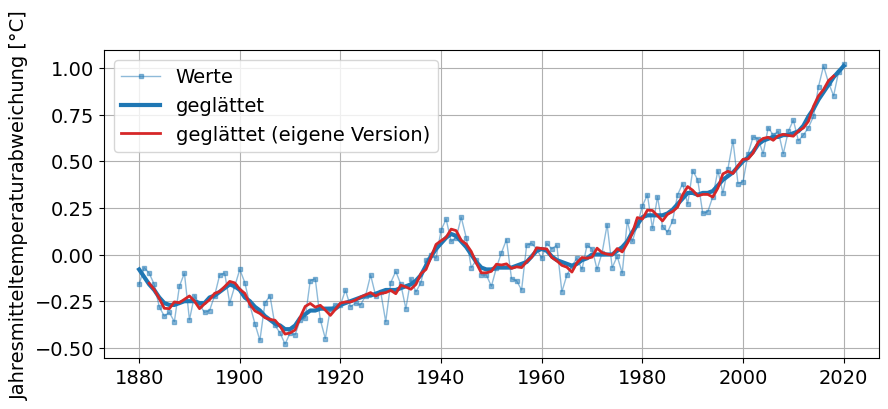

In [82]:
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Temperatur [°C]")
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA["Year"],Temp_NASA["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:blue", alpha=0.5, label="Werte");
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(5)"], lw=3,  color="tab:blue", label="geglättet");
plt.plot(Temp_NASA["Year"],Temp_NASA["Rollender Mittelwert (5)"], lw=2,  color="tab:red", label="geglättet (eigene Version)");
plt.legend();
plt.grid();

## Durchschnittstemperatur (Land + Ozean getrennt)

**Aufgabe a)** Stellen Sie die Kurven für die Erwärmung an Landoberfläche und an der Ozeanoberfläche grafisch dar und beschriften Sie das Diagramm entsprechend

In [83]:
link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv"

In [84]:
Temp_NASA2 = pd.read_csv(link, header=1) # einlesen
Temp_NASA2 # Ausgabe

,Year,Land_Annual,Lowess(5),Ocean_Annual,Lowess(5).1
0,1880,-0.56,-0.45,-0.05,0.01
1,1881,-0.37,-0.49,0.01,-0.02
2,1882,-0.46,-0.53,0.00,-0.06
3,1883,-0.54,-0.57,-0.06,-0.09
4,1884,-0.82,-0.61,-0.15,-0.12
...,...,...,...,...,...
136,2016,1.47,1.27,0.70,0.62
137,2017,1.36,1.33,0.64,0.64
138,2018,1.21,1.40,0.60,0.65
139,2019,1.42,1.45,0.68,0.67


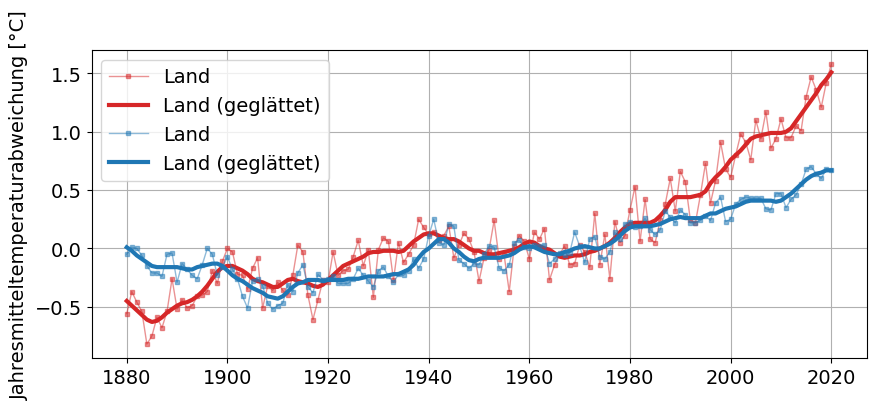

In [86]:
plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Temperatur [°C]")
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Land_Annual"], ls="-", lw=1, marker="s", ms=3, color="tab:red", alpha=0.5, label="Land");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5)"], lw=3,  color="tab:red", label="Land (geglättet)");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Ocean_Annual"], ls="-", lw=1, marker="s", ms=3, color="tab:blue", alpha=0.5, label="Land");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5).1"], lw=3,  color="tab:blue", label="Land (geglättet)");
plt.legend();
plt.grid();